In [1]:
import matplotlib.pyplot as plt

from superfv import EulerSolver, plot_1d_slice, initial_conditions

In [2]:
N = 64


def sinus(idx, x, y, z, t, xp):
    return initial_conditions.sinus(
        idx,
        x,
        y,
        z,
        t,
        bounds=(3.111e-02, 1),
        P=1.616e-01,
        vx=1,
        xp=xp,
    )


sim1 = EulerSolver(
    ic=sinus,
    nx=N,
    p=1,
    flux_recipe=2,
)

sim2 = EulerSolver(
    ic=sinus,
    nx=N,
    p=1,
    flux_recipe=2,
    MUSCL=True,
    MUSCL_limiter=None,
)

In [3]:
n_steps = 50
sim1.ssprk2(n=n_steps)
sim2.musclhancock(n=n_steps)

Step #50 @ t=1.96e-01 | dt=3.91e-03 | min(rho)=4.69e-02, min(P)=1.62e-01 | (done)                   
Step #50 @ t=1.96e-01 | dt=3.92e-03 | min(rho)=4.69e-02, min(P)=1.62e-01 | (done)                   


/Users/jonathan/Desktop/superfv/superfv/hydro.py:98: RuntimeWarning: divide by zero encountered in divide
  vx = mx / rho if "x" in active_dims else 0.0
/Users/jonathan/Desktop/superfv/superfv/hydro.py:98: RuntimeWarning: invalid value encountered in divide
  vx = mx / rho if "x" in active_dims else 0.0
/Users/jonathan/Desktop/superfv/superfv/hydro.py:101: RuntimeWarning: invalid value encountered in multiply
  K = 0.5 * rho * (vx**2 + vy**2 + vz**2)
/Users/jonathan/Desktop/superfv/superfv/hydro.py:112: RuntimeWarning: divide by zero encountered in divide
  w[idx("passives")] = u[idx("passives")] / rho
/Users/jonathan/Desktop/superfv/superfv/hydro.py:112: RuntimeWarning: invalid value encountered in divide
  w[idx("passives")] = u[idx("passives")] / rho
/Users/jonathan/Desktop/superfv/superfv/hydro.py:98: RuntimeWarning: divide by zero encountered in divide
  vx = mx / rho if "x" in active_dims else 0.0
/Users/jonathan/Desktop/superfv/superfv/hydro.py:98: RuntimeWarning: invalid value 

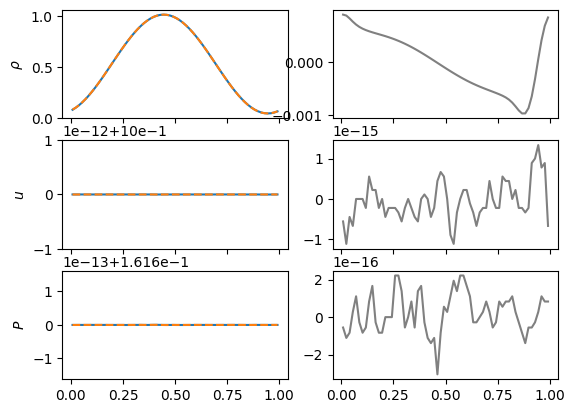

In [4]:
fig, axs = plt.subplots(3, 2, sharex=True)

axs[0, 0].set_ylabel(r"$\rho$")
axs[1, 0].set_ylabel(r"$u$")
axs[2, 0].set_ylabel(r"$P$")

style = dict()

idx = sim1.variable_index_map
x = sim1.mesh.x_centers
w_sim1 = sim1.snapshots[-1]["w"][:, :, 0, 0]
w_sim2 = sim2.snapshots[-1]["w"][:, :, 0, 0]

plot_1d_slice(sim1, axs[0, 0], "rho")
plot_1d_slice(sim2, axs[0, 0], "rho", linestyle="--")
axs[0, 1].plot(x, w_sim2[idx("rho")] - w_sim1[idx("rho")], color="gray")

plot_1d_slice(sim1, axs[1, 0], "vx")
plot_1d_slice(sim2, axs[1, 0], "vx", linestyle="--")
axs[1, 1].plot(x, w_sim2[idx("vx")] - w_sim1[idx("vx")], color="gray")

plot_1d_slice(sim1, axs[2, 0], "P")
plot_1d_slice(sim2, axs[2, 0], "P", linestyle="--")
axs[2, 1].plot(x, w_sim2[idx("P")] - w_sim1[idx("P")], color="gray")